In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt


In [2]:
df = pd.read_csv('/Users/cream/Downloads/weather.csv')
# convert to date
df['time'] = pd.to_datetime(df['time'])

# convert temp
df['Ftemp'] = df['Ktemp'] * 9/5 - 459.67

# year and month
df['year'] = df['time'].dt.year
df['month'] = df['time'].dt.month
df.head()

,time,longitude,latitude,Ktemp,Ftemp,year,month
0,1950-01-01 09:00:00,286,40.75,274.39734,34.245212,1950,1
1,1950-01-02 09:00:00,286,40.75,277.07593,39.066674,1950,1
2,1950-01-03 09:00:00,286,40.75,280.80090,45.771620,1950,1
3,1950-01-04 09:00:00,286,40.75,287.14010,57.182180,1950,1
4,1950-01-05 09:00:00,286,40.75,285.65262,54.504716,1950,1


### Task 1

In [2]:
import ipywidgets as widgets
from IPython.display import display

def plot_avg_monthly_temps(year):
    # Filter data for the selected year
    df_year = df[df['year'] == year]

    # monthly average temperature 
    monthly_avg_F = df_year.groupby('month')['Ftemp'].mean()

    # Clear previous figure and plot
    plt.clf()
    plt.plot(monthly_avg_F.index, monthly_avg_F.values, marker='o', linestyle='-')
    plt.title(f'Average Monthly Temperatures in {year} (Fahrenheit)')
    plt.xlabel('Month')
    plt.ylabel('Temperature (°F)')
    plt.xticks(np.arange(1, 13), ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'])
    plt.show()

# widget for the slider
year_slider = widgets.IntSlider(
    value=df['year'].min(),
    min=df['year'].min(),
    max=df['year'].max(),
    step=1,
    description='Year:',
    continuous_update=False
)

widgets.interactive(plot_avg_monthly_temps, year=year_slider)

### Slide the slider to see different month's data. Link:

https://drive.google.com/file/d/1B-trokIwZFIODT9Y3AlmA9cxEE9pDdiO/view?usp=share_link

### Task 2

In [17]:
# average
year_avg = df.groupby('year')['Ftemp'].mean()

# find the first
first_55 = year_avg[year_avg > 55].index[0]
print(f'The first year with an annual average temp above 55F is {first_55}.')

The first year with an annual average temp above 55F is 1953.


### Task 3
I made a plot where I showed two trends: the trend of highest(lowest) temperature each year. It could help people visualize the direct result global warming

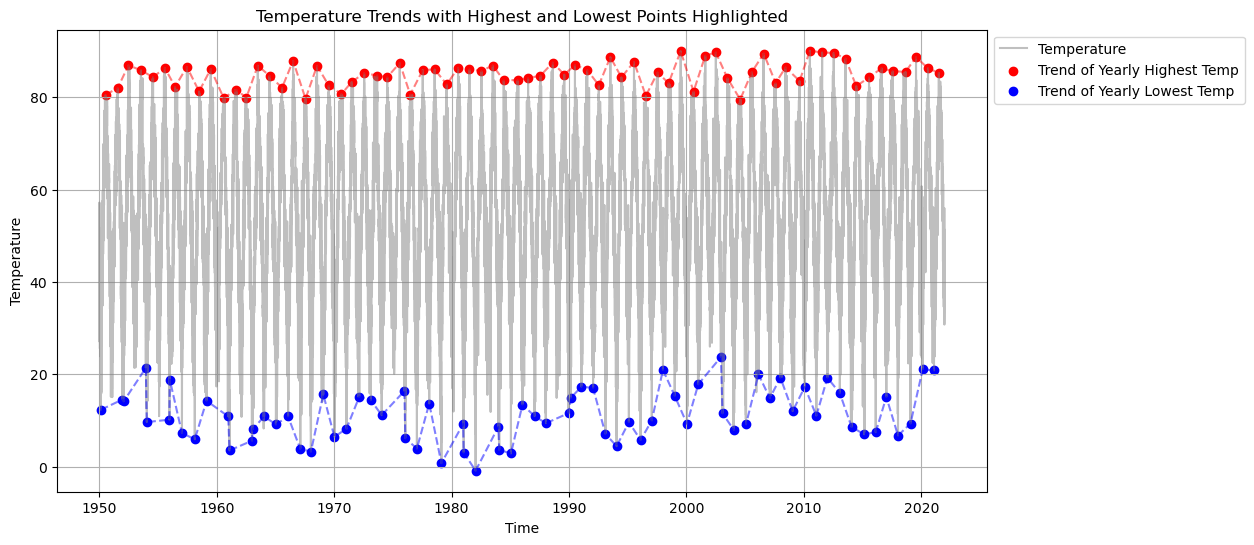

In [32]:

max_temp = df['Ftemp'].max()
min_temp = df['Ftemp'].min()
max_temp_date = df[df['Ftemp'] == max_temp]['time'].iloc[0]
min_temp_date = df[df['Ftemp'] == min_temp]['time'].iloc[0]

# Plotting the temperature trend
plt.figure(figsize=(12, 6))
plt.plot(df['time'], df['Ftemp'], label='Temperature', color='gray', alpha=0.5)

highest_points = []
lowest_points = []

for year in df['year'].unique():
    yearly_data = df[df['year'] == year]
    max_temp = yearly_data['Ftemp'].max()
    min_temp = yearly_data['Ftemp'].min()
    max_temp_date = yearly_data[yearly_data['Ftemp'] == max_temp]['time'].iloc[0]
    min_temp_date = yearly_data[yearly_data['Ftemp'] == min_temp]['time'].iloc[0]
    highest_points.append((max_temp_date, max_temp))
    lowest_points.append((min_temp_date, min_temp))

highest_df = pd.DataFrame(highest_points, columns=['Date', 'Temperature'])
lowest_df = pd.DataFrame(lowest_points, columns=['Date', 'Temperature'])
plt.scatter(highest_df['Date'], highest_df['Temperature'], color='red', label='Trend of Yearly Highest Temp')
plt.scatter(lowest_df['Date'], lowest_df['Temperature'], color='blue', label='Trend of Yearly Lowest Temp')
plt.plot(highest_df['Date'], highest_df['Temperature'], color='red', linestyle='--', alpha=0.5)
plt.plot(lowest_df['Date'], lowest_df['Temperature'], color='blue', linestyle='--', alpha=0.5)
plt.title('Temperature Trends with Highest and Lowest Points Highlighted')
plt.xlabel('Time')
plt.ylabel('Temperature')
plt.legend(loc='upper left', bbox_to_anchor=(1, 1))
plt.grid(True)
plt.show()


The plot shows two trends: the trend of variation in highest(lowest) temperature each year. It could help people visualize the direct result global warming.